In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Describing all numeric features in dataset

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Numeric features are:-
### 1.Postal Code
### 2.Sales
### 3. Quantity
### 4.Discount
### 5. Profit

## There are no missing  values  for all numeric features present in dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Describing all non-numeric features in dataset

In [5]:
df.describe(exclude=['int64','float64'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [6]:
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Region'].unique())
print(df['Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']


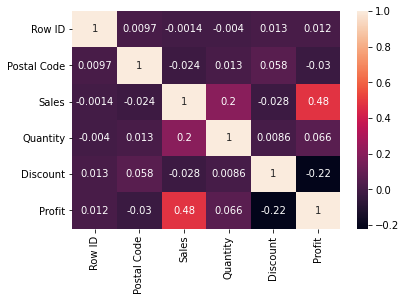

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### We have 531 city to look up, So lets have a look for Top 20 city contributing to sales and profit. We also look top 20 low selling cities so that we can focus there to improve sales



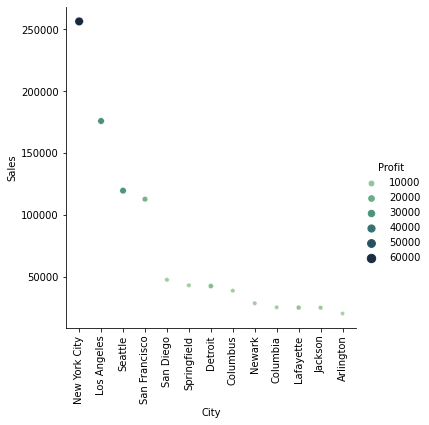

In [8]:
# top 20 city  for contribution most of sales and profit

top_20_sales = df.groupby(by = 'City').sum().sort_values(by=["Sales"],ascending=False).head(20)[["Sales"]]
top_20_profit = df.groupby(by = 'City').sum().sort_values(by=["Profit"],ascending=False).head(20)[["Profit"]]

top_20_cities = top_20_sales.merge(top_20_profit,on="City")
top_20_cities.reset_index(inplace=True)

sns.relplot(x="City", y="Sales", data=top_20_cities,hue='Profit',size="Profit",palette="ch:r=-.5,l=.75")
plt.xticks(rotation =90)
plt.show()

### we can infer that cities having maximum sales also have maximum profit hence cor-rlation proved


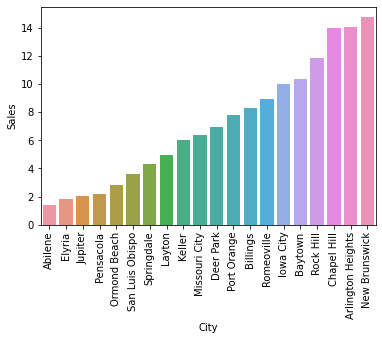

In [9]:
# top 20 city for  contributing least of sales and profit 

least_20_sales = df.groupby(by='City').sum().sort_values(by=['Sales'], ascending=True).head(20)[["Sales"]]

least_20_sales.reset_index(inplace=True)

sns.barplot(x='City', y='Sales',data = least_20_sales)

plt.xticks(rotation =90)
plt.show()

## Most profitable region

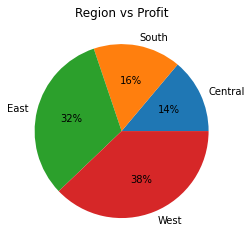

In [10]:
df_region = df.groupby(by = "Region").sum().sort_values("Profit")
df_region.drop(['Row ID', 'Postal Code'], inplace = True, axis = 1)
df_region.reset_index(inplace = True)

plt.pie(df_region["Profit"],labels= df_region["Region"], autopct = '%0.0f%%')
plt.title('Region vs Profit')
plt.show()

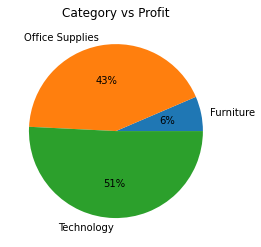

In [11]:
df_region  =df.groupby(by = "Category").sum().sort_values("Profit")
df_region.drop(['Row ID', 'Postal Code'], inplace  = True, axis = 1)
df_region.reset_index(inplace = True)

plt.pie(df_region["Profit"], labels = df_region["Category"], autopct = '%0.0f%%')
plt.title("Category vs Profit")
plt.show()

## Least and Most selling products

In [12]:
print(f'Least selling product is `{df.groupby(["Product Name"]).sum().sort_values(["Sales"]).index[0]}`')
print(f'Most selling product is `{df.groupby(["Product Name"]).sum().sort_values(["Sales"]).index[-1]}`')

Least selling product is `Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac`
Most selling product is `Canon imageCLASS 2200 Advanced Copier`


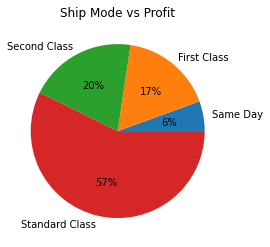

In [13]:
df_regions = df.groupby("Ship Mode").sum().sort_values("Profit")
df_regions.drop(['Row ID','Postal Code'],inplace=True,axis=1)
df_regions.reset_index(inplace=True)
plt.pie(df_regions["Profit"],labels=df_regions['Ship Mode'],autopct = '%0.0f%%')
plt.title("Ship Mode vs Profit")
plt.show()

   ## Most sold categories for top 20 city of USA

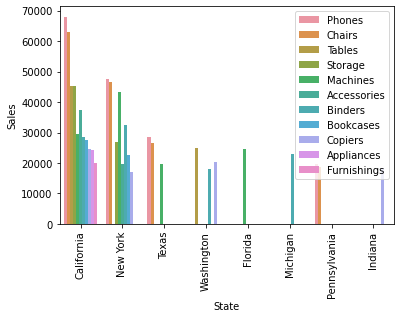

In [14]:
pvt = df.groupby(by=["State", "Sub-Category"]).sum("Sales").sort_values(by = "Sales", ascending=False).head(30).reset_index()
# pvt = pvt.pivot(index="State", columns="Category", values='Sales').reset_index()
# pvt.set_index('State').plot(kind='bar', color=["blue","red","cyan","black","yellow","green"],figsize=(18,10),stacked=True)

sns.barplot(x='State',y='Sales',hue='Sub-Category',data=pvt)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()


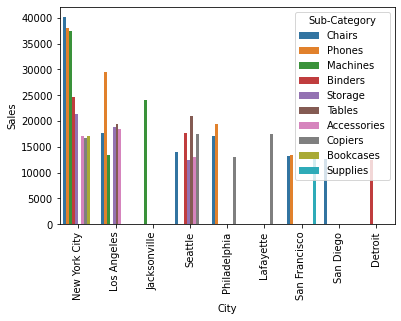

In [15]:
pvt=df.groupby(by=["City","Sub-Category"]).sum("Sales").sort_values(by="Sales",ascending=False).head(30).reset_index()
# pvt = pvt.pivot(index="State", columns="Category", values='Sales').reset_index()
# pvt.set_index('State').plot(kind='bar', color=["blue","red","cyan","black","yellow","green"],figsize=(18,10),stacked=True)
sns.barplot(x='City',y='Sales',hue='Sub-Category',data=pvt)
plt.xticks(rotation=90)
plt.show()

## Checking the co-relation between discount and profit made

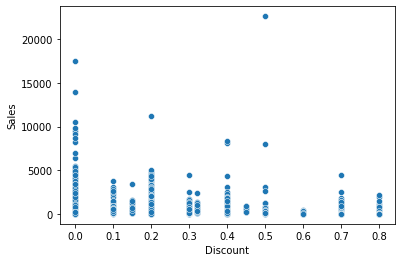

In [16]:
sns.scatterplot(x ='Discount', y = 'Sales', data=df)
plt.show()

C:\Users\Nitish\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nitish\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


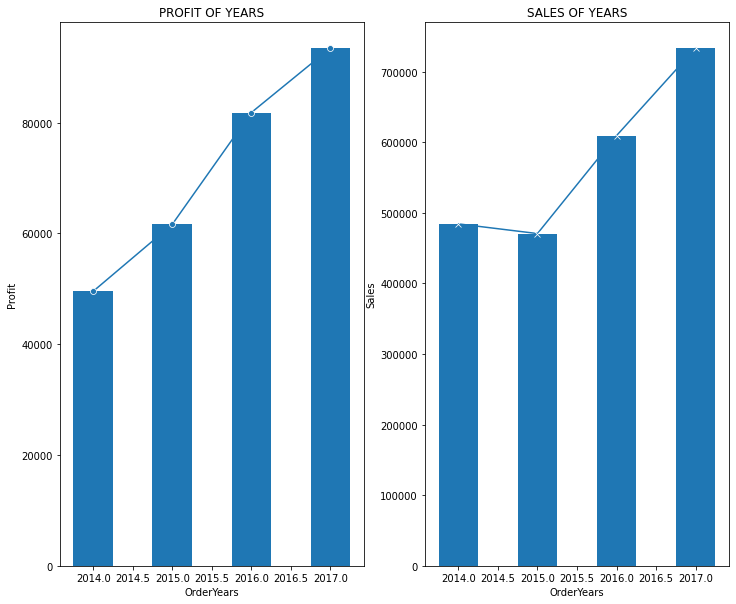

In [17]:
df['PROFITSYears']=pd.DatetimeIndex(df['Order Date']).year
yd=df.groupby(by=["PROFITSYears"]).sum("Profit").reset_index()
df['OrderYears']=pd.DatetimeIndex(df['Order Date']).year
yd=df.groupby(by=["OrderYears"]).sum("Sales").reset_index()
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
sns.lineplot(yd["OrderYears"],yd["Profit"],marker='o',)
plt.bar(yd["OrderYears"],yd["Profit"],width=0.5)
plt.title("PROFIT OF YEARS")
plt.subplot(1, 2, 2)
sns.lineplot(yd["OrderYears"],yd["Sales"],marker='x')
plt.bar(yd["OrderYears"],yd["Sales"],width=0.5)
plt.title("SALES OF YEARS")

plt.show()

df.drop(['PROFITSYears','OrderYears'],inplace=True,axis=1)

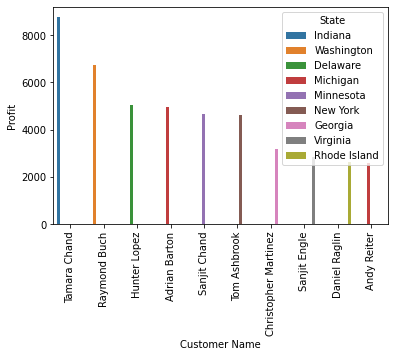

In [18]:
df_customer = df.groupby(["Customer Name","State"]).sum("Profit").sort_values("Profit",ascending=False)
df_customer.reset_index(inplace=True)
df_customer.drop("Row ID",axis=1)
df_customer = df_customer.head(10)
df_customer

sns.barplot(x='Customer Name',y='Profit',hue='State',data=df_customer)
plt.xticks(rotation=90)
plt.show()

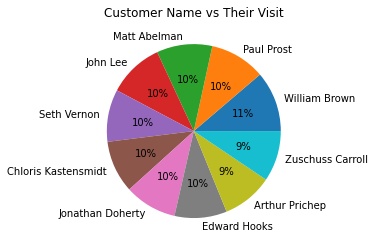

In [19]:
df_count = pd.DataFrame(columns=["Count"])
df_count["Count"] = df["Customer Name"].value_counts().head(10)
df_count.reset_index(inplace=True)
df_count.rename({"index":"Customer Name"},inplace=True,axis='columns')

plt.pie(df_count["Count"],labels=df_count['Customer Name'],autopct = '%0.0f%%')
plt.title("Customer Name vs Their Visit")
plt.show()